<a href="https://colab.research.google.com/github/abel2210/pycbc/blob/main/pycbc_waveform.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pycbc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.6/47.6 kB 2.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 30.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 1.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 92.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.4/40.4 MB 25.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━

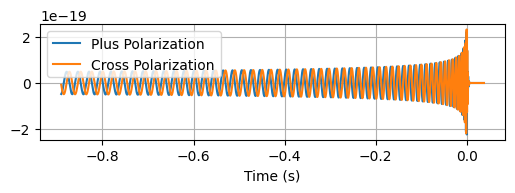

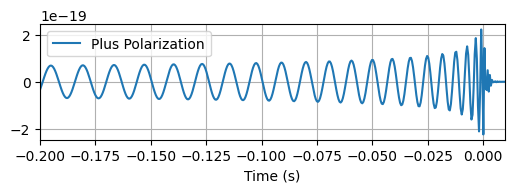

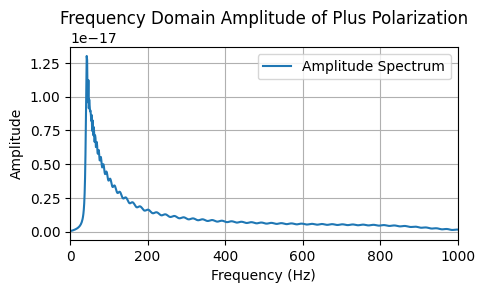

In [ ]:
%matplotlib inline

from pycbc.waveform import get_td_waveform
import pylab
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# The output of this function are the "plus" and "cross" polarizations of the gravitational-wave signal
# as viewed from the line of sight at a given source inclination (assumed face-on if not provided)
hp, hc = get_td_waveform(approximant="SEOBNRv4_opt",

                         mass1=10,
                         mass2=10,
                         delta_t=1.0/2048,
                         f_lower=40)#起始频率
plt.figure(figsize=(6, 1.5))
plt.plot(hp.sample_times, hp, label='Plus Polarization')
plt.plot(hp.sample_times, hc, label='Cross Polarization')
plt.xlabel('Time (s)')
plt.legend()
plt.grid()
plt.show()

pylab.figure(figsize=(6, 1.5))
pylab.plot(hp.sample_times, hp, label='Plus Polarization')
#pylab.plot(hp.sample_times, hc, label='Cross Polarization')
pylab.xlabel('Time (s)')
pylab.xlim(-.2, .01)
pylab.legend()
pylab.grid()
pylab.show()


fs = 1.0 / hp.delta_t
n = len(hp)
freq = np.fft.fftfreq(n, d=hp.delta_t)
hp_fft = np.fft.fft(hp)  # 傅里叶变换
amp = np.abs(hp_fft)

mask = freq >= 0
freq_pos = freq[mask]
amp_pos = amp[mask]

# 绘制振幅-频率关系
plt.figure(figsize=(5, 2.5))
plt.plot(freq_pos, amp_pos, label='Amplitude Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Frequency Domain Amplitude of Plus Polarization')
plt.xlim(0, 1000)
plt.grid()
plt.legend()
plt.show()

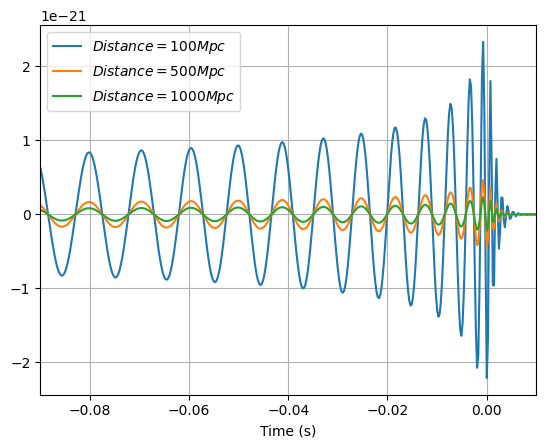

In [ ]:
for d in [100, 500, 1000]:
    hp, hc = get_td_waveform(approximant="SEOBNRv4_opt",
                         mass1=10,
                         mass2=10,
                         delta_t=1.0/4096,
                         f_lower=30,
                         distance=d)

    pylab.plot(hp.sample_times, hp, label='$Distance=%sMpc$' % d)
    pylab.xlim(-.09, .01)
pylab.legend()
pylab.grid()
pylab.xlabel('Time (s)')
pylab.show()

# 新段落

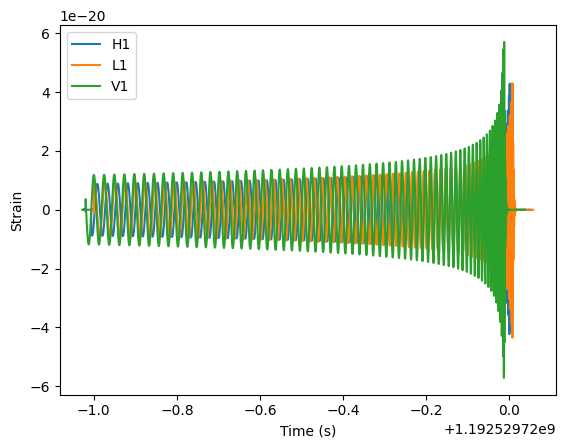

In [ ]:
import matplotlib.pyplot as pp
from pycbc.waveform import get_td_waveform
from pycbc.detector import Detector


apx = 'SEOBNRv4'
# NOTE: Inclination runs from 0 to pi, with poles at 0 and pi
#       coa_phase runs from 0 to 2 pi.
hp, hc = get_td_waveform(approximant=apx,
                         mass1=10,
                         mass2=10,
                         spin1z=0.9,
                         spin2z=0.4,
                         inclination=1.23,
                         coa_phase=2.45,
                         delta_t=1.0/4096,
                         f_lower=40)

det_h1 = Detector('H1')
det_l1 = Detector('L1')
det_v1 = Detector('V1')

# Choose a GPS end time, sky location, and polarization phase for the merger
# NOTE: Right ascension and polarization phase runs from 0 to 2pi
#       Declination runs from pi/2. to -pi/2 with the poles at pi/2. and -pi/2.
end_time = 1192529720
declination = 0.65
right_ascension = 4.67
polarization = 2.34
hp.start_time += end_time
hc.start_time += end_time

signal_h1 = det_h1.project_wave(hp, hc,  right_ascension, declination, polarization)
signal_l1 = det_l1.project_wave(hp, hc,  right_ascension, declination, polarization)
signal_v1 = det_v1.project_wave(hp, hc,  right_ascension, declination, polarization)

pp.plot(signal_h1.sample_times, signal_h1, label='H1')
pp.plot(signal_l1.sample_times, signal_l1, label='L1')
pp.plot(signal_v1.sample_times, signal_v1, label='V1')

pp.ylabel('Strain')
pp.xlabel('Time (s)')
pp.legend()
pp.show()

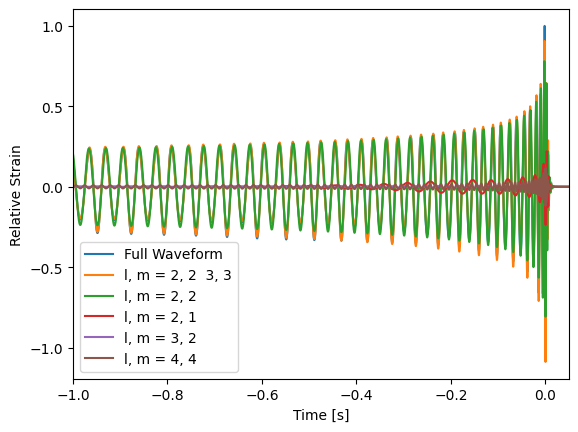

In [ ]:
import matplotlib.pyplot as pp
from pycbc.waveform import get_td_waveform

# Let's plot what our new waveform looks like
pp.figure()

# You can select sets of modes or individual modes using the 'mode_array'
# The standard format is to provide a list of (l, m) modes, however
# a string format is also provided to aid use in population from config files.
# e.g. "22 33" is also acceptable to select these two modes.
# "None" will result in the waveform return its default which is usually
# to return all implemented modes.
for mode_select in [None,
                    [(2, 2), (3, 3)], # Select two modes at once
                    [(2, 2)],
                    [(2, 1)],
                    [(3, 2)],
                    [(4, 4)],
                   ]:
    hp, hc = get_td_waveform(approximant="IMRPhenomXPHM",
                         mass1=7,
                         mass2=40,
                         f_lower=20.0,
                         mode_array=mode_select,
                         inclination = 1.0,
                         delta_t=1.0/4096)



    if mode_select is None:
        label = 'Full Waveform'
        a = hp.max()
    else:
        label = "l, m = " + '  '.join([f"{l}, {m}" for l, m in mode_select])

    (hp / a).plot(label=label)

pp.xlim(-1, 0.05)
pp.legend()
pp.xlabel('Time [s]')
pp.ylabel('Relative Strain')
pp.show()